## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
def sample_cards(N, n, k, replacement=False):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=replacement)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
cards = sample_cards(100, 6, 3)
cards

array([[ 7, 15, 76],
       [26, 35, 97],
       [18, 61, 83],
       [13, 22, 49],
       [10, 31, 67],
       [ 4, 29, 68]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([ 7, 15, 76]), array([26, 35, 97]))

The lowest card in the game is

In [5]:
np.min(cards)

4

In [6]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

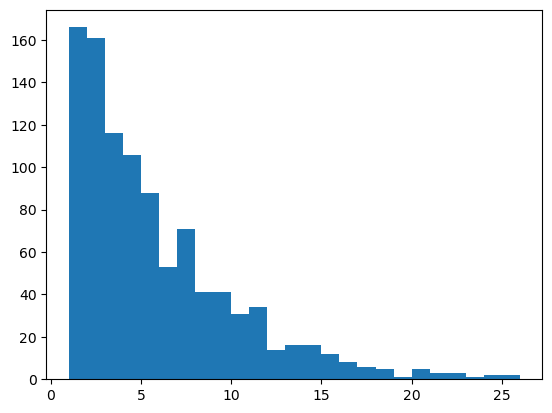

In [7]:
# To Do cell
minimums = []
for rounds in range(1000):
    minimums.append(np.min(cards))
    cards = sample_cards(100, 6, 3)
#plt.hist(minimums, bins=100)
plt.hist(minimums, bins = np.unique(minimums))
plt.show()

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

16.9825


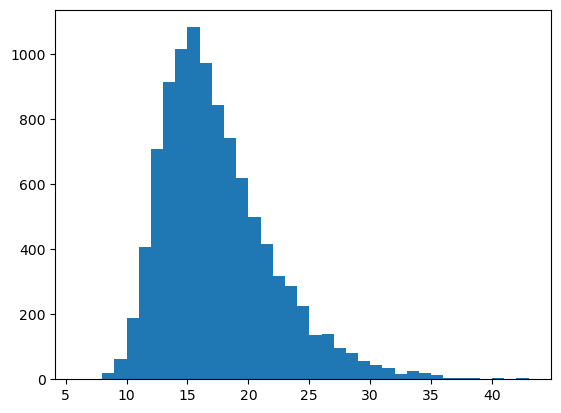

In [8]:
# To Do cell

def largest_gap(c):
    differences = []
    for card in range(len(c) - 1):
        differences.append(c[card + 1] - c[card])
    return np.max(differences)

def gaps(c):
    differences = []
    for card in range(len(c) - 1):
        differences.append(c[card + 1] - c[card])
    return differences

def first_distribution(N, n, k):
    maximums = []
    for round in range(10000):
        cards = sample_cards(N, n, k)
        c = np.sort(np.ndarray.flatten(cards))
        maximums.append(largest_gap(c))
    return maximums

maximums = first_distribution(100, 6, 3)
    
print(np.mean(maximums))
plt.hist(maximums, bins = np.unique(maximums))
plt.show()

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

16.3865


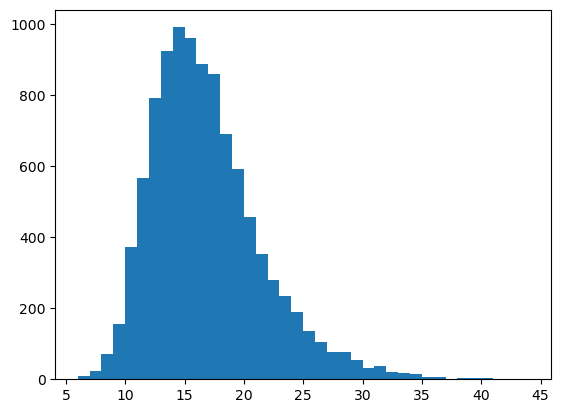

In [9]:
# To Do cell


def largest_gap_diff_player(c):
    
    # Find the consecutives in each hand to check for later
    c = np.sort(c)
    differences_player = []
    for player in c:
        
        # record the consecutive cards in each hand
        for card in range(len(player) - 1):
            differences_player.append((player[card], player[card + 1]))
    
    # Find the largest difference between consecutive cards in different hands
    c = np.sort(np.ndarray.flatten(c))
    differences = []
    for card in range(len(c) - 1):
        
        #check to make sure consecutive cards are not in same players hand
        if (c[card], c[card + 1]) not in differences_player:
            differences.append(c[card + 1] - c[card])
            
    return np.max(differences)

def second_distribution(N, n, k):
    maximums = []
    for round in range(10000):
        cards = sample_cards(N, n, k)
        maximums.append(largest_gap_diff_player(cards))
    return maximums

maximums2 = second_distribution(100, 6, 3)
print(np.mean(maximums2))
plt.hist(maximums2, bins = np.unique(maximums2))
plt.show()


How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

Mean of distribution 1: 16.9825
Mean of distribution 2: 16.3865


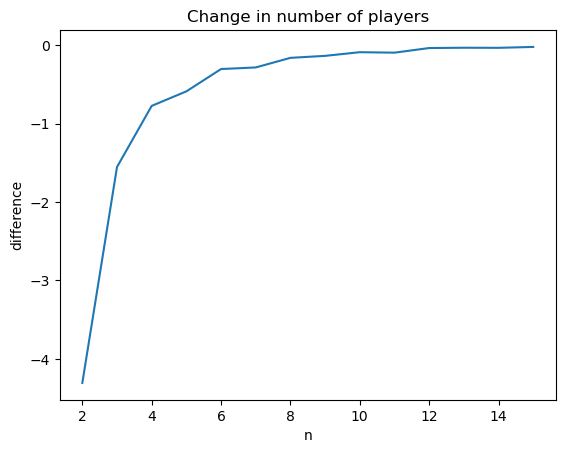

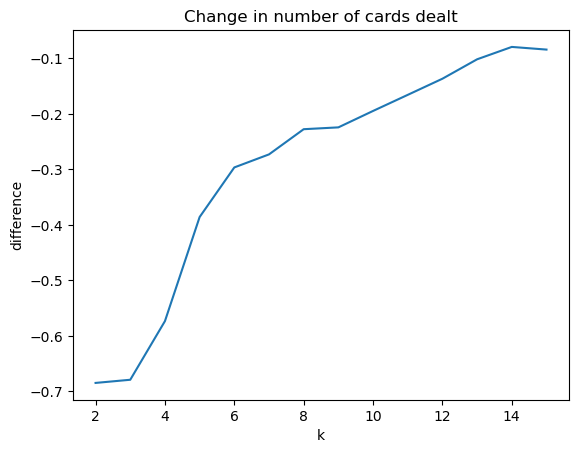

In [11]:
# To Do cell

print("Mean of distribution 1:", np.mean(maximums))
print("Mean of distribution 2:", np.mean(maximums2))

diff_in_means = []
for n in range(2, 16):
    first = first_distribution(100, n, 6)
    second = second_distribution(100, n, 6)
    diff_in_means.append(np.mean(second) - np.mean(first))

plt.plot(range(2, 16), diff_in_means)
plt.title("Change in number of players")
plt.xlabel("n")
plt.ylabel("difference")
plt.show()

diff_in_means = []
for k in range(2, 16):
    first = first_distribution(100, 6, k)
    second = second_distribution(100, 6, k)
    diff_in_means.append(np.mean(second) - np.mean(first))

plt.plot(range(2, 16), diff_in_means)
plt.title("Change in number of cards dealt")
plt.xlabel("k")
plt.ylabel("difference")
plt.show()


As the number of players increase, the difference between the means goes to 0. Essentially, it becomes less likely for a player to hold the maximum gap. The same sort of behavior happens as we increase the number of cards dealt, but does not look like it goes to 0. It might be more likely tha the gaps are simply becoming smaller.

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

1.72324


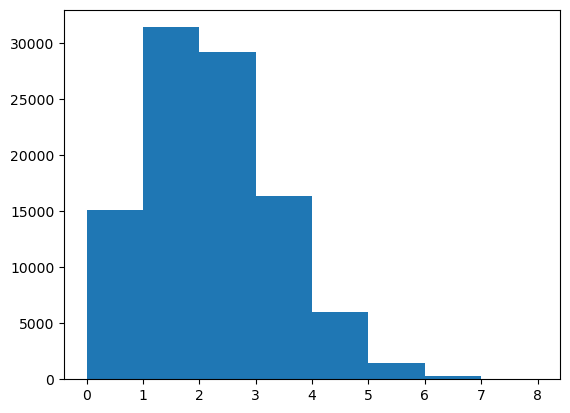

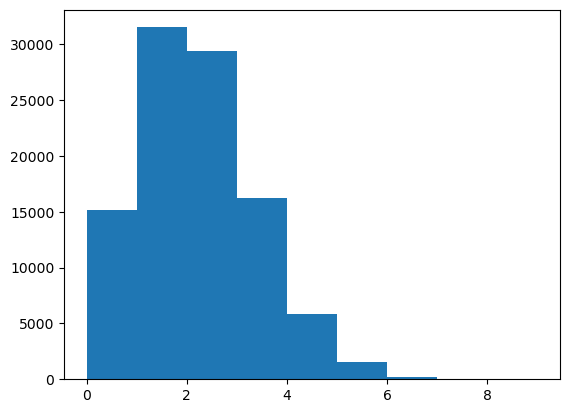

In [13]:
#To Do cell
def sample_game(n, k):
    """ Returns true if the game is won and false if the game is lost """

    cards = sample_cards(100, n, 1)
    cards = list(np.sort(cards))
    cards_played = []

    while len(cards_played) < n * k:
        random_player = np.random.randint(1, n)
        if len(cards[random_player]) > 0:
            next_card = cards[random_player][0]
            cards[random_player] = cards[random_player][1:]

            # check if card is less than all the minimums of the other players
            for player in cards:
                if len(player) > 0:
                    if player[0] < next_card:
                        return False
        cards_played.append(next_card)

    return True

average_wins = []
for x in range(100000):
    wins = 0 
    for game in range(10): 
        if sample_game(3, 2): 
            wins += 1 
    average_wins.append(wins)

print(np.mean(average_wins))
plt.hist(average_wins, bins = np.unique(average_wins))
plt.show()

bin_dist = np.random.binomial(10, np.mean(average_wins) / 10, 100000)
plt.hist(bin_dist, bins = np.unique(bin_dist))
plt.show()



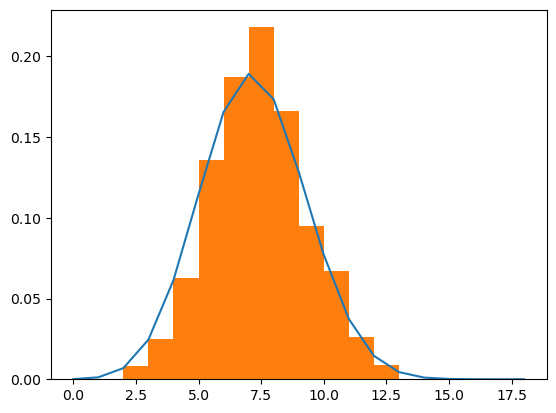

In [32]:
num_cards_less_than_40 = []
N = 100
n = 6
k = 3

# Create a binomial random variable
for x in range(1000):
    cards = np.ndarray.flatten(sample_cards(N, n, k))
    num_cards_less_than_40.append(sum([(card < 40) for card in cards]))


# PLot the binomial distribution
from scipy.stats import binom

binomial = []
for x in range(n * k + 1):
    binomial.append(binom.pmf(x, n * k, .4))
plt.plot(range(n * k + 1), binomial)
plt.hist(num_cards_less_than_40, density = True, bins = np.unique(num_cards_less_than_40))
plt.show()

The first example is the number of wins in ten games. The game is played by a random player playing their lowest card. This clearly follows a binomial distribution as observed above with the histograms. We can also create an approximately binomial distribution, by finding out how many cards dealt in the game are below 40. This will not be exactly binomial since we are sampling without replacement. However, the distribution does look very similar as we see above.

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

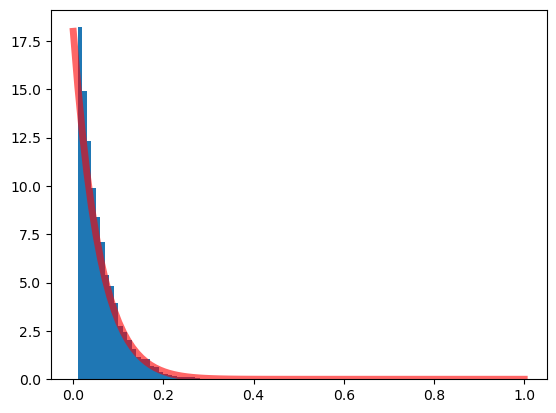

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

In [67]:
# To Do cell
n = 18
k = 1

# PLot the minimum value histogram
minimums = []
for rounds in range(10000):
    minimums.append(np.min(cards) / 100)
    cards = sample_cards(100, 6, 3)

# Configure plot
fig, ax = plt.subplots(1, 1)
plt.hist(minimums , bins = np.unique(minimums), density = True)

# Draw the beta distribution
from scipy.stats import beta
#plt.hist(np.random.beta(k, n + 1 - k, 100))
x = np.linspace(0, 1, 100)
ax.plot(x, beta.pdf(x, k, n + 1 - k),
       'r-', lw=5, alpha=0.6, label='beta pdf')

plt.show()


We have n * k = 18 order statistics, so the minimum should be roughly distributed as Beta(k, n + 1 - k) with the right scaling which we see is the case above.

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

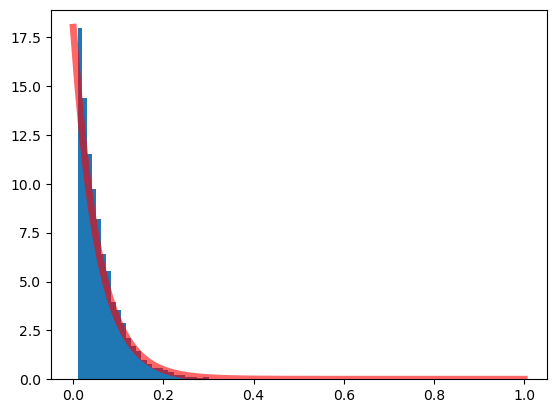

In [132]:
N = 100
n = 6
k = 3

# Transform the random variable
minimums = []
for rounds in range(10000):
    minimums.append(-np.log(1 - np.min(cards) / N ))
    cards = sample_cards(100, 6, 3)
plt.hist(minimums, np.unique(minimums), density = True)


from scipy.stats import expon

# Draw the exponential distribution
x = np.linspace(0, 1, 100)
plt.plot(x, expon.pdf(x, scale=1/(n*k)),
       'r-', lw=5, alpha=0.6, label='expon pdf')

plt.show()

The distributions match very closely with the correct scaling.

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

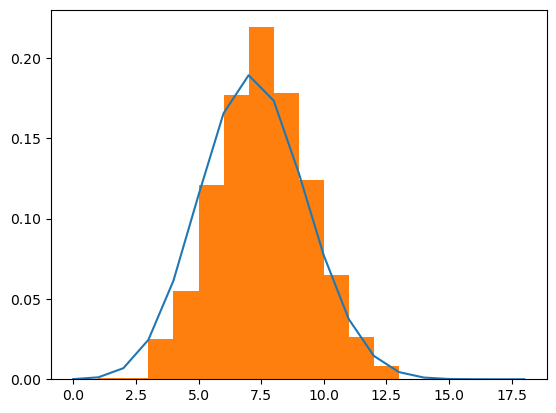

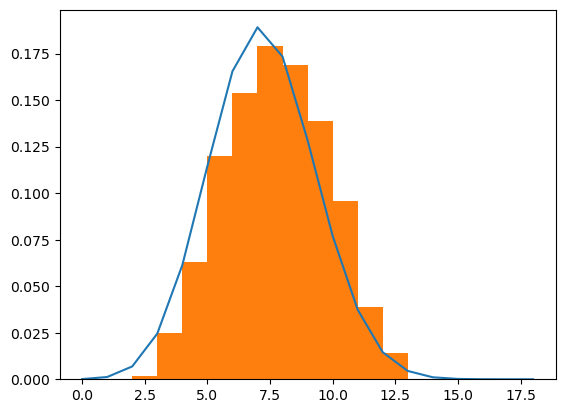

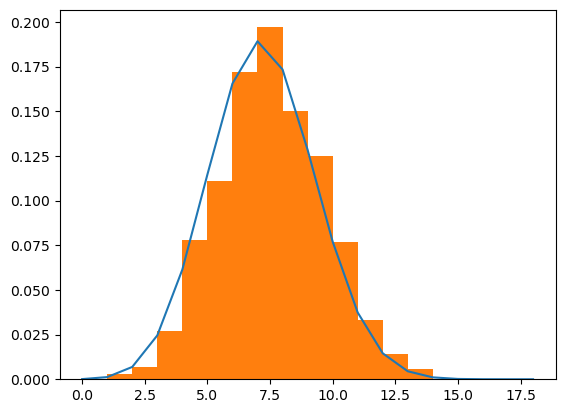

In [140]:
# To Do cell


N = 100
n = 6
k = 3

for N in [100, 1000, 10000]:
    num_cards_less_than_40 = []
    # Create a binomial random variable
    for x in range(1000):
        cards = np.ndarray.flatten(sample_cards(N, n, k))
        num_cards_less_than_40.append(sum([(card < .4 * N) for card in cards]))


    # PLot the binomial distribution
    from scipy.stats import binom

    binomial = []
    for x in range(n * k + 1):
        binomial.append(binom.pmf(x, n * k, .4))
    plt.plot(range(n * k + 1), binomial)
    plt.hist(num_cards_less_than_40, density = True, bins = np.unique(num_cards_less_than_40))
    plt.show()

The distribution becomes a better and better approximation as N increases. Essentially, getting the same value becomes unlikely so its like we are sampling with replacement.

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: 
- Member No2: 
- Member No3: